In [ ]:
#판다스 EDA 및 seaborn차트 이해

In [2]:
import pandas as pd
file_path='C:/data/dataList/dust.xlsx' 
dust=pd.read_excel(file_path) #dust 엑셀파일 읽어오기
# dust.head()
dust.info() # 기본정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [4]:
dust.describe() #데이터개수(count), 평균, 표준편차, max, min, 데이터하위25%, 데이터 중간값50%, 데이터하위75%(상위25%)

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [8]:
#한글 colums을 영문명으로 바꾸기
dust.rename(columns={'날짜':'date', '아황산가스':'so2', '일산화탄소':'co', '오존':'o3', '이산화질소':'no2'}, inplace=True)
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [10]:
dust['date']=dust['date'].str[:11] #0000-00-00 연월일만 추출
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [11]:
#날짜 자료형을 날짜형으로 변환(object->datetime64[ns])
dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [14]:
dust['year']=dust['date'].dt.year # year 컬럼 생성(date열에서 연도정보 추출해서 dust['year']에 저장)
dust['month']=dust['date'].dt.month #month 컬럼 생성
dust['day']=dust['date'].dt.day #day 컬럼 생성
dust.columns
# dust.head()

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [16]:
#컬럼 순서 재정렬
dust=dust[['date', 'year', 'month','day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]
dust.columns

Index(['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10',
       'PM2.5'],
      dtype='object')

In [18]:
dust.isnull().sum() #결측치 확인 

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [20]:
dust=dust.fillna(method='pad') #결측치를 이전 데이터로 채우기 index4에서 PM10이 Nan이였는데 17로 채워짐 
dust.head()

C:\Users\bluecom010\AppData\Local\Temp\ipykernel_27168\2421433315.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust=dust.fillna(method='pad')


,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [21]:
dust.fillna(20,inplace=True) #index0에서 PM10이 Nan이였는데 20으로 채움 
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [22]:
dust.isnull().sum() #결측치 다 처리 됐나 확인하기 

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [78]:
import pandas as pd
file_path="C:\data\dataList\weather.xlsx"
weather=pd.read_excel(file_path)
weather.head()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bluecom010\AppData\Local\Temp\ipykernel_27168\4102739979.py:2: SyntaxWarning: invalid escape sequence '\d'
  file_path="C:\data\dataList\weather.xlsx"


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [79]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [80]:
#지점, 지점명 삭제
weather.drop('지점', axis=1, inplace=True)
weather.drop('지점명', axis=1, inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [81]:
#특수기호가 들어간 컬럼명 영어로 변경 
weather.columns=['date', 'temp', 'wind', 'rain', 'humid']
weather.head()
weather.columns

Index(['date', 'temp', 'wind', 'rain', 'humid'], dtype='object')

In [82]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [83]:
# 컬럼 일부 데이터(시간) 제거
# weather['date'] = pd.to_datetime(weather['date']).dt.date 
weather['date'] = weather['date'].dt.date 
#pd.to_datetime(weather['date'])  : 'date' 열을 datetime 형식으로 변환
# dt.date  :  datetime 형식에서 날짜 부분만 남기고 시간 부분을 제거
weather.info()
# weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    743 non-null    object 
 1   temp    743 non-null    float64
 2   wind    743 non-null    float64
 3   rain    743 non-null    float64
 4   humid   743 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.2+ KB


In [84]:
weather['date']=pd.to_datetime(weather['date']) # date의 object->datetime64[ns]로 변경  
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


,date,temp,wind,rain,humid
0,2021-01-01,-7.2,0.6,0.0,57.5
1,2021-01-01,-7.6,0.7,0.0,57.5
2,2021-01-01,-8.2,0.6,0.0,62.0
3,2021-01-01,-8.1,0.5,0.0,60.5
4,2021-01-01,-8.7,1.3,0.0,66.4


In [85]:
# weather.isnull().sum()
weather['rain'].value_counts()

rain
0.0    720
0.5      9
1.0      7
1.5      3
2.5      2
2.0      2
Name: count, dtype: int64

In [86]:
# 강수량이 0인 값을 0.01로 변환
weather['rain']=weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [90]:
dust.shape #(744, 10)
# dust.head()

(744, 10)

In [93]:
weather.shape #(743, 5)
weather.head()

,date,temp,wind,rain,humid
0,2021-01-01,-7.2,0.6,0.01,57.5
1,2021-01-01,-7.6,0.7,0.01,57.5
2,2021-01-01,-8.2,0.6,0.01,62.0
3,2021-01-01,-8.1,0.5,0.01,60.5
4,2021-01-01,-8.7,1.3,0.01,66.4


In [96]:
dust.drop(index=743,inplace=True) # 743번째 인덱스에 해당하는 행을 제거, inplace=True하면 새로운 데이터프레임을 반환하지 않고 원본 데이터프레임이 변경 됨
dust.shape #(743, 10)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [98]:
df=pd.merge(dust,weather,on='date') #date칼럼을 기준으로 병합
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.01,66.4


In [111]:
# 모든 요소별 상관관계 확인하기 : 미세먼지를 기준으로 각 변수와의 상관관계
df.corr()
# df.corr()['PM10']

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026688,0.176721
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026688,0.176721
so2,-0.318239,NaN,NaN,-0.318239,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571,-0.375131,0.031460,-0.019907,-0.096445
co,0.226099,NaN,NaN,0.226099,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664,0.318052,-0.322431,0.077531,0.338083
o3,-0.118081,NaN,NaN,-0.118081,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078,-0.203804,0.355105,-0.096761,-0.288327
no2,0.206333,NaN,NaN,0.206333,0.085989,0.841594,-0.924362,1.000000,0.420554,0.566387,0.313188,-0.403745,0.109930,0.315524
PM10,0.016124,NaN,NaN,0.016124,0.160874,0.529720,-0.348229,0.420554,1.000000,0.825433,0.175430,-0.108474,0.026272,0.216753
PM2.5,0.051036,NaN,NaN,0.051036,0.147571,0.692664,-0.525078,0.566387,0.825433,1.000000,0.190698,-0.202018,0.069123,0.354713


In [107]:
# 미세먼지와 다른 요소와의 상관관계
corr=df.corr()
corr
corr['PM10'].sort_values(ascending=False) # 내림차순으로 미세먼지(PM10)과 상관관계
# 미세먼지(PM10)와 초미세먼지(PM2.5), CO, NO2가 상관관계 높다는거 알 수 있음


PM10     1.000000
PM2.5    0.825433
co       0.529720
no2      0.420554
humid    0.216753
temp     0.175430
so2      0.160874
rain     0.026272
date     0.016124
day      0.016124
wind    -0.108474
o3      -0.348229
year          NaN
month         NaN
Name: PM10, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >, <Axes: >]],
      dtype=object)

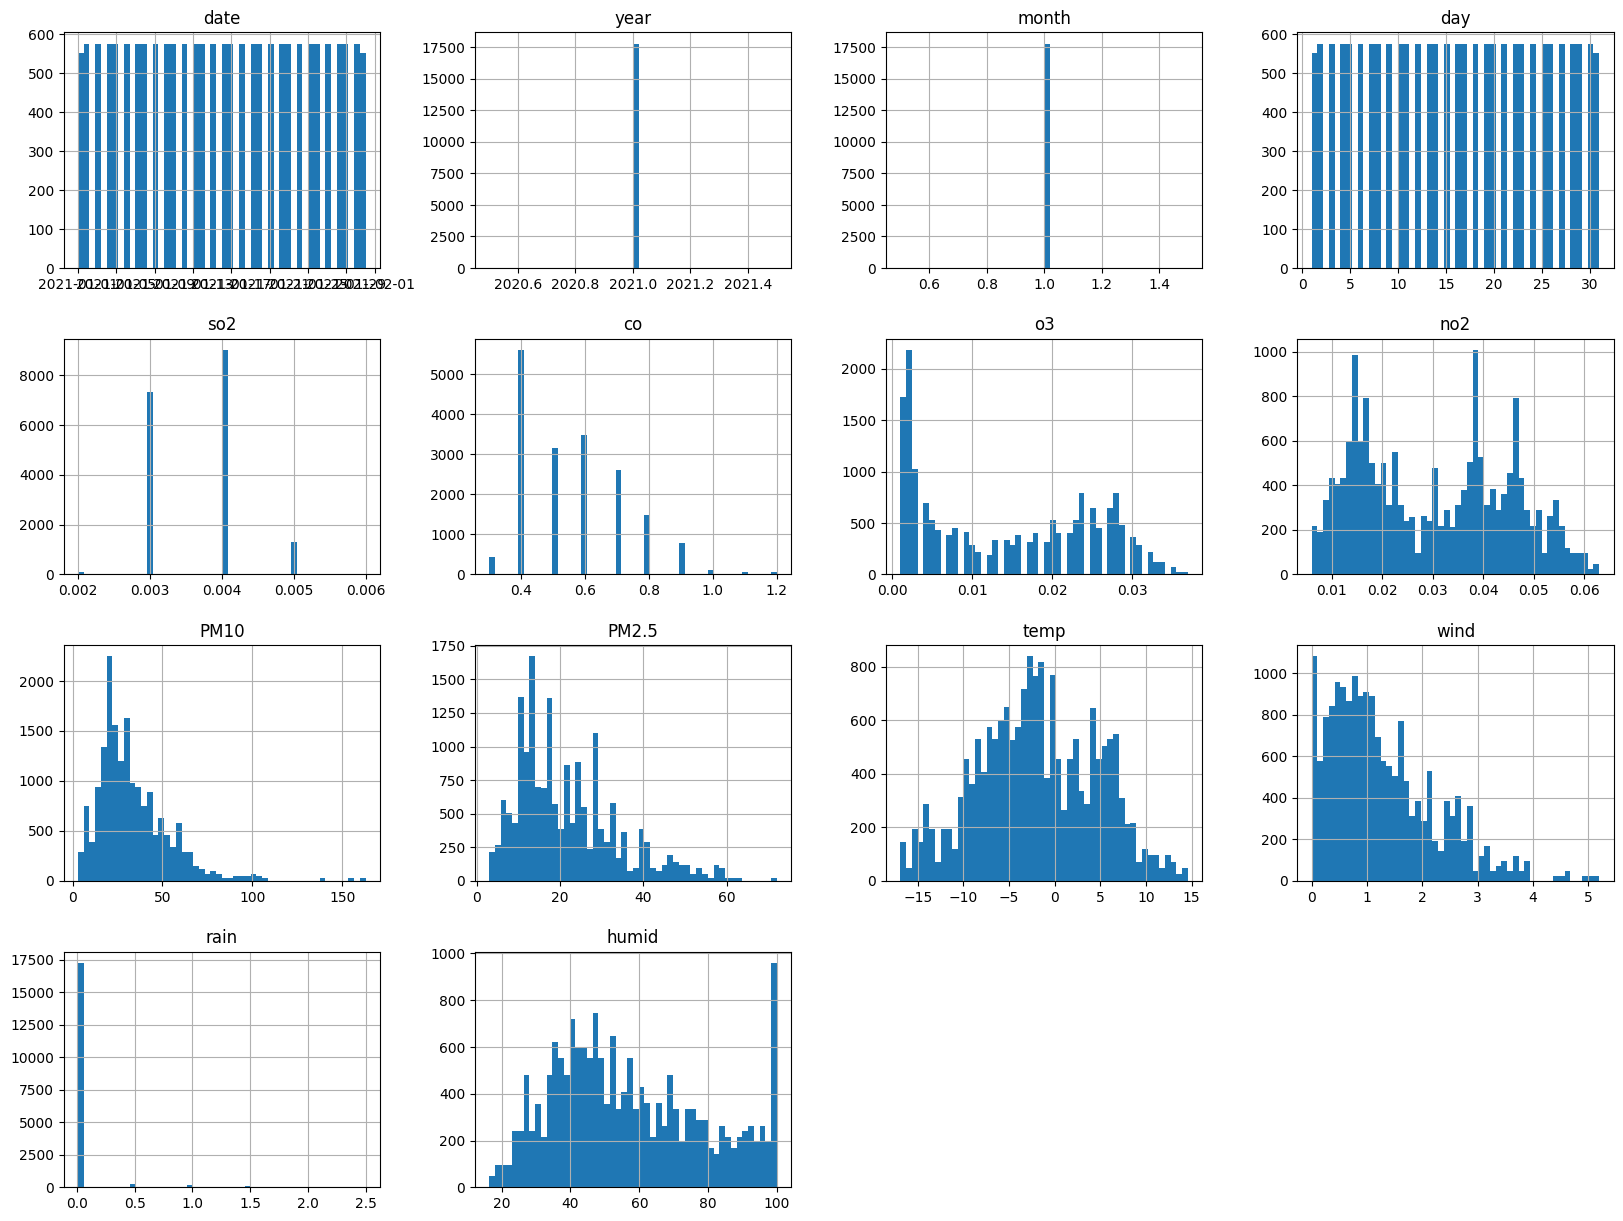

In [112]:
# 히스토그램으로 시각화하기
df.hist(bins=50,figsize=(20,15)) #막대 50개

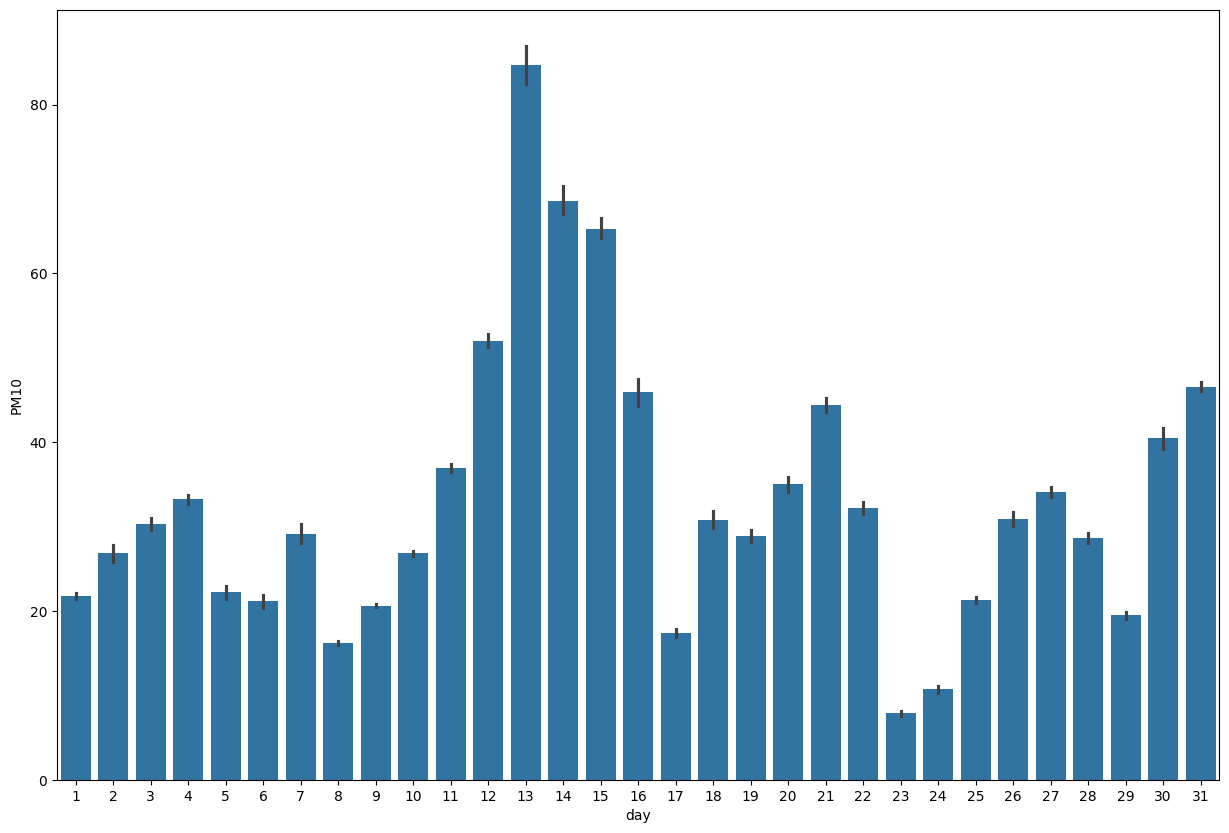

In [114]:
#일별 PM10(미세먼지) 평균현황
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
dayGraph=sns.barplot(x='day',y='PM10',data=df)
plt.xticks(rotation=0)
plt.show()

<Axes: >

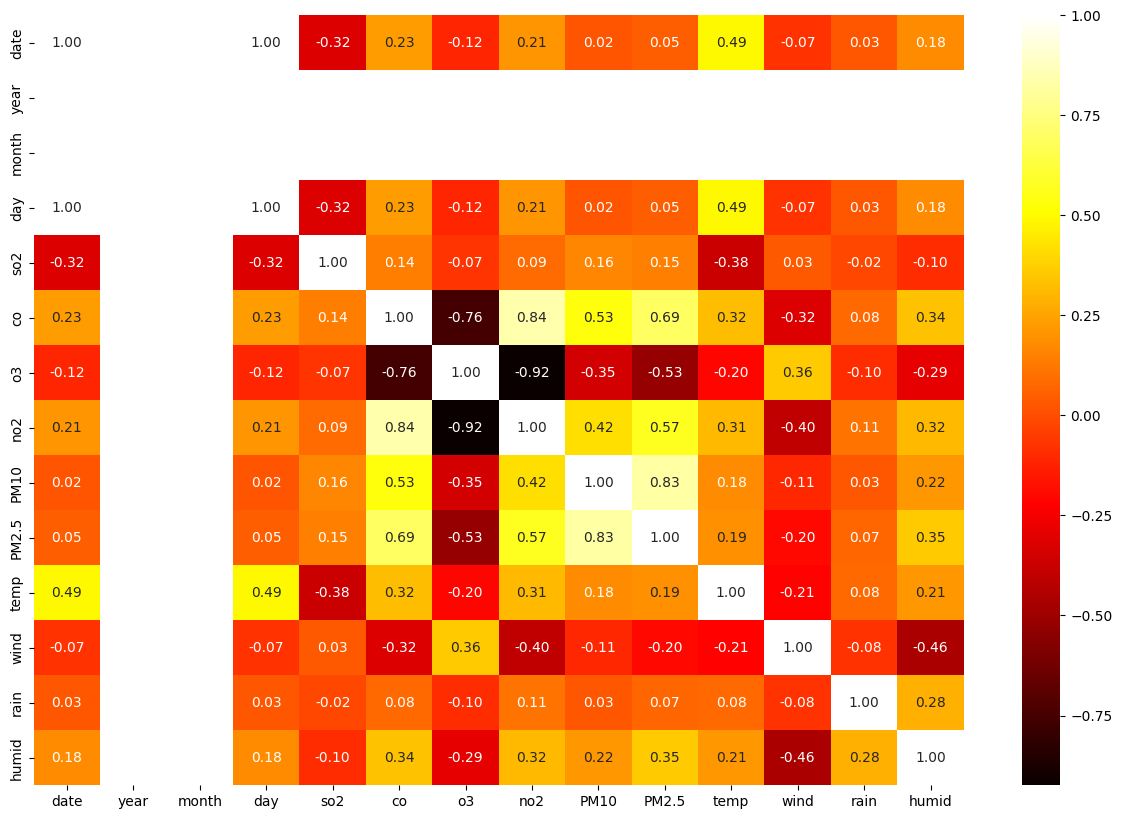

In [116]:
#히트맵 이용하여 상관관계 시각화하기
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, fmt='.2f',cmap='hot') # 상관관계 corr 사용/ 각 셀에 실제 값 표시/ 소수점 2자리/높은값이 밝은색

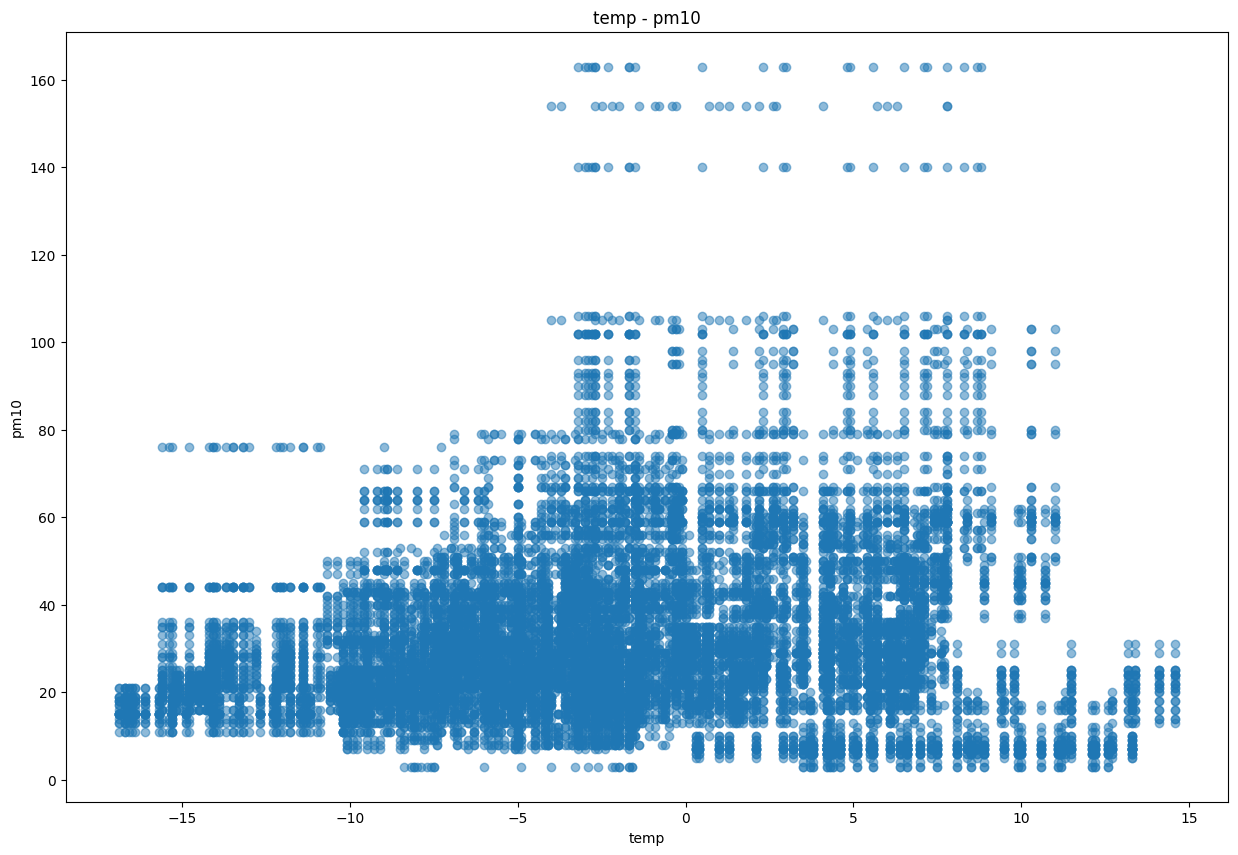

In [117]:
# 산점도 그래프로 시각화 : 온도와 미세먼지 상관관계
plt.figure(figsize=(15,10))
x=df['temp'] #온도
y=df['PM10'] #미세먼지
plt.plot(x,y,marker='o',linestyle='none',alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()
#결론 : 상관관계 없음 

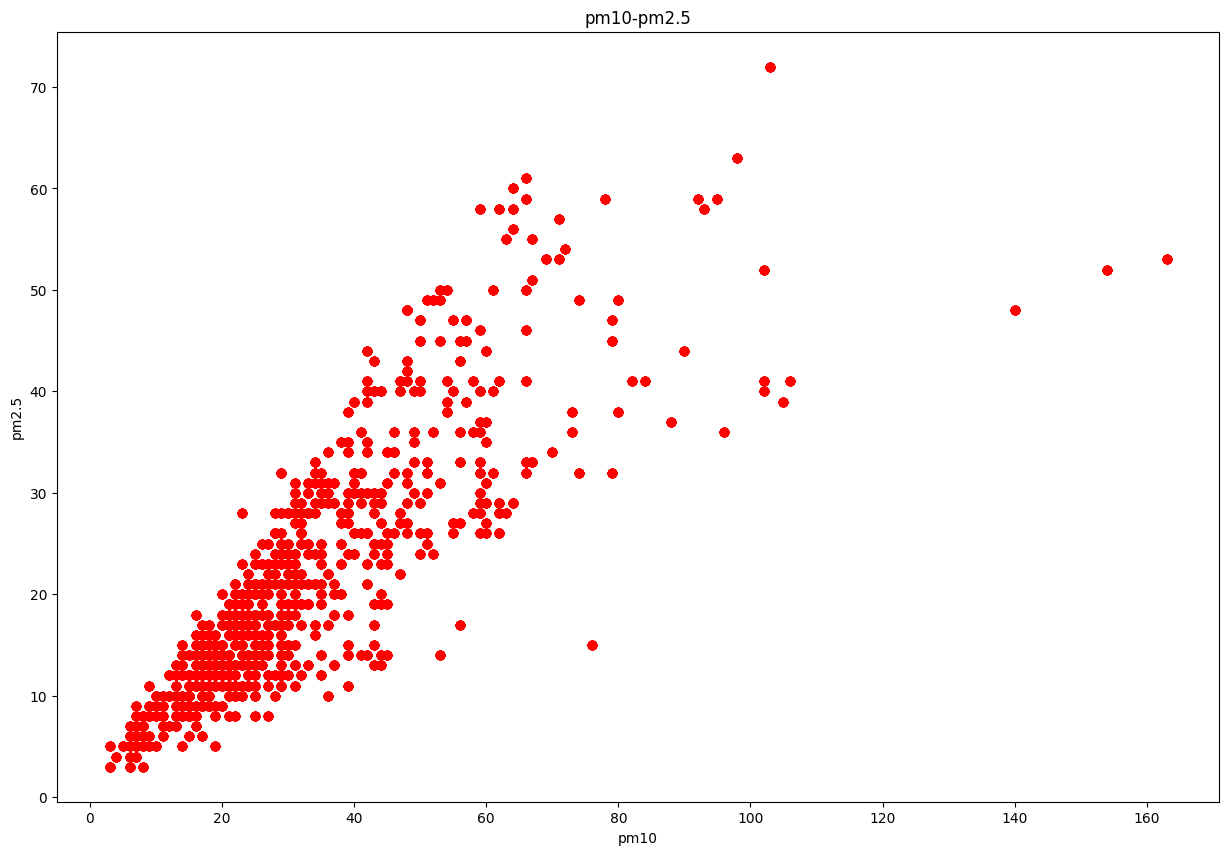

In [118]:
# 산점도 그래프로 시각화 : # 미세먼지와 초미세먼지의 상관관계

plt.figure(figsize=(15,10))
x=df['PM10'] #미세먼지
y=df['PM2.5']#초미세먼지
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()
# 결론 : 미세먼지와 초미세먼지가 선형성을 가짐 -> 상관관계 있음